In [1]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("data.csv")

In [3]:
all_df['class']= all_df['class'].map({'RB':0, 'NRB': 1}).astype(int)

In [4]:
X=all_df.drop(['class'], axis=1).values.astype('float64')

In [5]:
Y = all_df['class'].values.astype('int64')

In [6]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

844

In [7]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [8]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [10]:
model = Sequential()

In [11]:
model.add(Conv1D(filters=123*4,
                 kernel_size=3,
                 padding='valid',
                 input_shape=(41,1), 
                 activation='relu'))

In [12]:
model.add(MaxPooling1D(pool_size=1))

In [13]:
model.add(Conv1D(filters=123*3,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [14]:
model.add(MaxPooling1D(pool_size=1))

In [15]:
model.add(Conv1D(filters=123*2,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [16]:
model.add(MaxPooling1D(pool_size=1))

In [17]:
model.add(Conv1D(filters=123,
                 kernel_size=3,
                 padding='valid', 
                 activation='relu'))

In [18]:
model.add(MaxPooling1D(pool_size=1))

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(41, activation='tanh'))

In [21]:
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 39, 492)           1968      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 39, 492)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 37, 369)           545013    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 37, 369)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 35, 246)           272568    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 35, 246)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 33, 123)           90897     
__________

In [23]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [24]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=30,verbose=1,callbacks=[early_stopping])

Train on 675 samples, validate on 169 samples
Epoch 1/30
675/675 [==============================] - 18s 27ms/step - loss: 0.4423 - acc: 0.7852 - val_loss: 0.3324 - val_acc: 0.8698
Epoch 2/30
675/675 [==============================] - 17s 25ms/step - loss: 0.3288 - acc: 0.8607 - val_loss: 0.3446 - val_acc: 0.8284
Epoch 3/30
675/675 [==============================] - 18s 27ms/step - loss: 0.3141 - acc: 0.8667 - val_loss: 0.3510 - val_acc: 0.8639


In [25]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

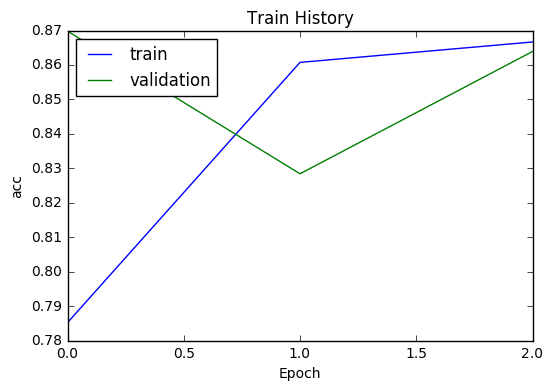

In [26]:
show_train_history(train_history,'acc','val_acc')

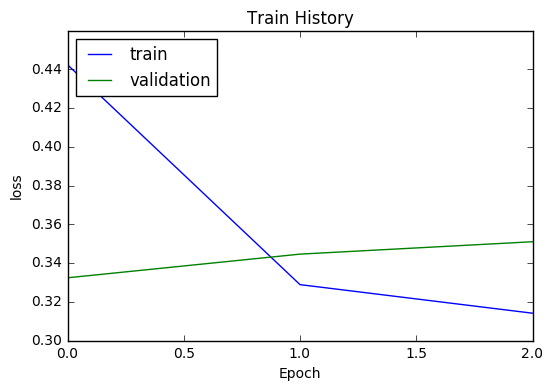

In [27]:
show_train_history(train_history,'loss','val_loss')

In [28]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

211/211 [==============================] - 1s 6ms/step


In [29]:
scores[1]

0.8530805706977844